<a href="https://colab.research.google.com/github/paulodowd/woiec2023/blob/main/Computer_Vision_A_Deep_Learning_Approach_using_Convolutional_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision: A Deep-Learning Approach using Convolutional Neural Nets**



---



**By the end of this worksheet you will:**

1. Have a greater understanding of the role of deep learning in computer vision, and robotics (and other fields)
2. Be familiar with the key steps in the machine/deep learning pipeline.
3. Be able to build simple deep learning models, and understand techniques to enhance the performance of the model

### **Biological vs Digital Sensors**

Humans perceive visual information through our eyes, which contain specialised cells called photoreceptors that capture light and convert it into electrical signals. We can effortlessly recognise objects, colours, and patterns, as well as perceive depth and motion. In contrast, computers or robots, use digital sensors like cameras to capture images, representing them as a collection of pixels as shown below.

![Pixel Representation of Images](https://static.packt-cdn.com/products/9781789613964/graphics/assets/8c65833d-b7f8-440e-8382-0001ac70af13.png)

Each pixel corresponds to a small area of the image and contains information about color and intensity. The pixel values fall within a range of 0-255 for each channel (red, green, and blue) in RGB images. Greyscale images contain only single channel, but the values still fall in the 0-255 range.

Computers rely on algorithms and computational models to analyse visual data. However, this poses a significant challenge due to how the appearance of objects can change when captured by a camera (see figure below). Varying lighting and perspectives, as well as occlusion can all have a significant effect.

![Figure: cats are challenging!](https://www.researchgate.net/profile/Mingle-Xu/publication/368464605/figure/fig5/AS:11431281120162006@1676378216076/Different-cat-instances-gives-the-intra-class-variation-Image-are-from-Class-CS231n-2.ppm)

### **Approaches to Computer Vision**
Traditional computer vision techniques, like edge detection, often face challenges in effectively handling variations such as these. Deep learning instead seeks to autonomously learn and extract hierarchical representations from large amounts of data. This approach has quickly become the predominant approach in computer vision, leading to remarkable advancements in image analysis ([AlexNet paper]()). The improvements deep learning has brought to computer vision has paved the way for significant breakthroughs in various applications, such as:

1. Autonomous vehicles and self-driving cars
2. Object recognition and detection for industrial automation
4. Medical imaging and diagnostics
5. Surveillance and security systems, including monitoring and environmental applications
6. Augmented reality and virtual reality experiences




# **What is Deep Learning?**

The terms "deep learning" and "deep networks" can be vague. Deep networks refer to neural networks that have a high number of hidden layers, but there isn't a specific threshold for the number of hidden layers that makes a network "deep".

In a deep network, the layers are generally connected in a sequential manner. The output of one layer serves as the input for the next layer. Each layer consists of a set of neurons, and the connections between these neurons are determined by the network architecture.

The figure below shows the three main types of layer:

1. Input layers. This layer receives the initial data/features. This could be raw data (e.g. images, text, or numerical values) or handcrafted features.

2. Hidden layers. These layers are the intermediate layers between the input and output layers. Each hidden layer consists of multiple neurons that apply mathematical operations on the input they receive. These operations involve weights and biases associated with the connections between neurons. The purpose of the hidden layers is to extract and learn hierarchical representations of the input data, gradually increasing the level of abstraction as information passes through the network.

3. Output layer. This layer provides the final results or predictions of the network. The number of neurons in the output layer depends on the specific task the network is designed for.

![Training Method](https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif "backprop")

#### **Introduction to Training a Deep Learning Network**

Training a deep learning network contains many stages. Fortunately, this will be handled for us - but it is still good to have a general understanding of the process under the hood. The key stages are listed below:
1. Forward pass. During the forward pass, input data flows through the network layer by layer, with each layer's output becoming the input for the next layer. Hidden layers perform computations using weights and biases, and apply activation functions for non-linearity.
2. Forward pass - make predictions. This process continues until the data reaches the output layer, producing the network's predicted output, which can be a single value or a vector representing classes or regression values.
3. Calculate loss by comparing the network's predicted output to the ground truth or true output. The goal of training a neural network is to minimise the loss function, which is achieved through optimisation algorithms like backpropagation.
4. Backpropagate through the network to minimise the loss function by changing the values of the weights (W) and biases (b).





#### **Forward Pass Hand Calculation**

The figure below shows a very tiny network, consisting of 3 inputs, a single hidden layer (with a single neuron) and an output later. The forward pass of this network can be defined by:

$f(x) = x_{1}w_{1} + b_{1} + x_{2}w_{2} + b_{2} + x_{2}w_{2}$ + b_{3}$

![Single Neuron](https://miro.medium.com/v2/resize:fit:1400/1*L9xLcwKhuZ2cuS8fF0ZjwA.png)

We will initialise the network so that the weights ($w_{1}, w_{2}, w_{3}$) are equal to 0.2, 0.3 and 0.4, respectively, while the bias terms ($b_{i}$) are set to zero. The input data $x_{1}, x_{2}, x_{3}$ is equivalent to 0.1, 0.3, and 0.5.

**Task**:
1. Calculate the output ($\hat{y}$) of the network.
2. Explore the use of activation functions (see figure below for some examples). Activation functions are applied to the output value at a given node, once it has been calculated. A linear activation function is equivalent to no activation function - our output is equal to the exact value that is calculated by the hidden layer. For example, if we applied the binary step activation function, and the output of the hidden layer was $f(x) > 0$, we would set the output of the hidden layer to 1 (or 0 if $f(x) < 0 $).

![Activation Functions](https://iq.opengenus.org/content/images/2021/11/Comparion-of-Activation-Functions--1-.png)

# **Deep Learning Pipeline**

In this worksheet, we will build a model that is capable of classifying (identifying) handwritten digits from 0 to 9. To develop accurate and effective models, we will need a well-structured machine learning pipeline, one typical examples is shown in the figure below. For this worksheet, our focus is steps 5 and 6, although we will briefly touch upon steps 3 and 4 as well.

![ML/DL Pipeline](https://media.licdn.com/dms/image/C5612AQHvNxtz_cF3HA/article-cover_image-shrink_600_2000/0/1568515485238?e=2147483647&v=beta&t=tFznklP_oYb1IiKaku1Y30402ASan_IGmXfofWa0kgU)

Each stage in this pipeline plays a crucial role in ensuring the model's performance and suitability for real-world applications. Keep these stages in mind as your progress through the worksheet!



## **Stage 1: Data preparation**


---


In this worksheet we will use a simple in-built dataset ([MNIST](https://www.tensorflow.org/datasets/catalog/mnist)). MNIST is a database of handwritten digits.

*Why MNIST and not a more complex dataset?* Simpler datasets generally work better with simpler models (and simple models take less time to train)! This approach will allow us to experiment with different architectures or training methods over a short timeframe. If you'd like to use a more complex dataset, please refer to the "Further Activities" section on this worksheet.

### **Steps**
1. Import required modules and load the data
2. Visualise data
3. Preprocess data

### Helper Functions

The cells in this section to ensure that the required modules and libraries are correctly imported, and define a number of helper functions that will be useful during our investigation. Run these cells, but do not edit them for now.




In [ ]:
# import required modules
import keras
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


from random import randint
from sklearn.model_selection import KFold

In [ ]:
def display_images(imgs_array, rows, cols):

  """
  Inputs:
    - imgs_array: array of images to display
    - num_images (int): the number of images you would like to display
    - rows (int): the number of rows for images to be displayed across
    - cols (int): the number of columns for images to be displayed across

    N.B. rows * cols = num_images
  """

  for i in range((rows*cols)):

    im = randint(0, X_train.shape[0])

    # define subplot
    plt.subplot(rows, cols, i+1)

    # plot raw pixel data
    plt.imshow(X_train[im], cmap='gray')

  # show the figure
  plt.show()


In [ ]:
def preprocess_data(data):

  # reshape training images to the correct input shape
  data = tf.reshape(data, shape=[-1, 28, 28, 1])
  data = tf.cast(data, tf.float32)/255.0

  return data

In [ ]:
def preprocess_labels(labels):

  # one hot encoding
  labels = pd.get_dummies(labels)

  return labels

### **Data Preparation Step 1: Load the Data**

The first step in any machine learning pipeline is to load the data. It is customary practice in machine learning to define your data (the image of the digit) as X, and your labels (what number the digit is, or what *class* it belongs to) as y. We will load the in-built MNIST dataset.

In [ ]:
# load in-built keras dataset of mnist digits
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# X_train = training data
# y_train = labels for training data
# X_test = testing data
# y_test = labels for testing data

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


We load the data in the format: (samples, width, height). We can see that the MNIST dataset, has a training set comprised of 60,000 images (or samples). How many images are in the testing set?

Each of these images has a size of 28x28 pixels. How many channels are there? Does this mean that the images are greyscale or RGB?

### **Data Preparation Step 2: Visualise the Data**

Visually reviewing data is a key step in determining patterns and trends, as well as detecting anomalies. The more images you review, the better you will understand your dataset.

The code block below displays a selection of random images from the training dataset. Run the code block a few times, to review the samples that make up the training set.

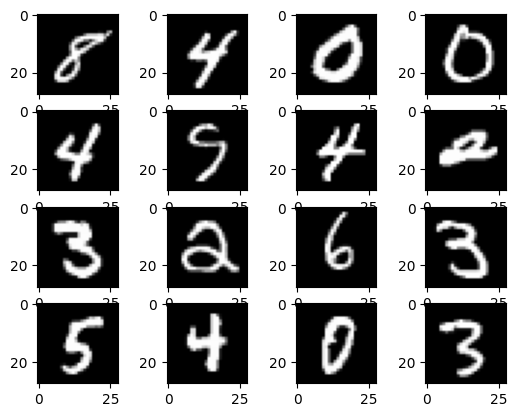

In [ ]:
rows, cols = 4, 4 # change these variables to determine the number of images you would like to review
display_images(X_train, rows, cols) # displays rows*cols images

The MNIST dataset is very structured - it is a dataset of handwritten digits between 0-9. Each image has a black background and contains one handwritten white number.

**Task:** While you are reviewing the dataset, consider the following questions:
1. Are there any numbers that are difficult to tell apart (low inter-class variance)?
2. Which single number is written in the greatest number of different ways (high intra-class variance)?



## **Stage 2: Model Selection and Training**

---


In this stage we will build and then train a machine learning algorithm (or model architecture) appropriate for the specific task at hand.

Model selection depends on factors such as: *(i)* the type of problem (classification, regression, etc.), *(ii)* the nature of the data, and *(iii)* the desired performance metrics. Once defined, the model can be trained.

### **Steps**
1. Build the model
2. Train the model and evaluate the performance
3. Refine the model
4. Iterate steps 1-3 to find the best model

### **Model Selection and Training Step 1: Build the Model**

We will use [Keras](https://keras.io/) (Tensorflow backend) to define our model. As shown in the figure below, a neural network is comprised of different types of layers.

![Figure: MLP](https://www.researchgate.net/publication/354817375/figure/fig2/AS:1071622807097344@1632506195651/Multi-layer-perceptron-MLP-NN-basic-Architecture.jpg)

Recall that the input layer takes in the preprocessed data, and feeds it to the model, while the output layer is typically a dense or fully-connected layer (see link below for further information). The structure of the hidden layers varies depending on the nature of the task.

Classification problems are problems in which a sample is to be classified into one of n classes. A couple of examples of classification problems are: sorting images into pictures of cats or dogs (and possibly more!), sorting images of digits according to which number is written, or classifying email as spam or not-spam. Regression problems are problems in which the output is a continuous value. This could include financial projections, for example, or predicting the bounding box location of objects in images.

For image classification tasks, three types of layers are particularly useful:

1. [Convolutional layers](https://keras.io/api/layers/convolution_layers/)
2. [Pooling layers](https://keras.io/api/layers/pooling_layers/)
3. [Dense - or fully connected - layers](https://keras.io/api/layers/core_layers/dense/)

**Task**: finish building the model below.
1. Define the input shape. This should match the shape of a single sample of your data (i.e. the height and width of a single image).
2. Define the output shape. This should match the number of classes in the dataset.
3. Test the function works by running the code block. A table that details the layers making up your model should be printed once the code has finished running. The column "output shape" details how the shape of the data changes as it passes through the network. Do different layers have different effects on the shape? How many parameters does this model have?

In [ ]:
def build_model(nrows, ncols, nchannels, num_classes):
  """ Do not change this function for now. """

  # define our input layer
  inputs = keras.Input(shape=(nrows, ncols, nchannels))

  # define the core model: a 2d-convolutional layer, followed by a max pooling layer
  conv2d = keras.layers.Conv2D(32, (3, 3), activation="relu")(inputs)
  pooling = keras.layers.MaxPooling2D((2, 2))(conv2d)

  ### add extra layers here, format
  # name = keras.layers.LAYERNAME()(name_of_previous_layer)

  #### don't change the layers below this

  # flatten the output from the convolutional block
  flatten = keras.layers.Flatten()(pooling)

  # and define the output layer
  ## fully-connceted/dense layers
  outputs = keras.layers.Dense(num_classes, activation="softmax")(flatten)

  # build the model
  model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

  print(model.summary())

  return model


## change the code below this
(nrows, ncols, nchannels) = (28,28,1) # input shape
num_classes = 10
build_model(nrows, ncols, nchannels, num_classes)

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
___________________________________________________

### **Model Selection and Training Step 2: Train the model**

#### **The Training Procedure in Practice**

In order to evaluate our model fairly, we need to split the data into a train, validation, and test set (data segregration). We use the train data to train our model, and first evaluate its performance on the validation set. We can try, for example, different model architectures to see if we can improve our performance on the validation set. **The test set is reserved solely for the final assessment**, once all improvements have been made, and we are happy with the performance on the validation set.

![How to split training data](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

This works well generally, but to improve our training process even further, we can use *k-fold cross-validation*. This is a technique where we split our data into k number of "folds". Each fold is held-out once during the training process and used as the validation set, while the others are used as the training set. This gives us a more holistic view of how the model performs on different types of data, as we are evaluating across a larger range of data.

The code below implements k-fold cross-validation and trains the model. There are a number of key parameters that we will need to set ahead of time, listed below:

1. Loss. We will use the [`CategoricalCrossentropy`](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) as we have more than two classes, and we will one-hot encode the labels (if you would like to explore why this is generally best practice you can do so [here]()). One-hot encoding ([more info here](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/)) is automatically handled by the helper functions earlier in the worksheet.
2. Learning rate. This essentially defines how much the model is allowed to update (how much to change the weights by) after the error has been calculated.
3. Number of folds. How many folds we split our training set into.
4. Number of epochs. How many times we train the model on our dataset. The training time of complex models, or very large datasets can quickly become very large - multiple weeks or months.
5. Batch size. This is the number of samples that are input to the model before the model is updated.

**Task:**
1. Define the parameters for [number of folds](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) (`n_folds`), the [batchsize](https://keras.io/api/models/model_training_apis/#fit-method) (`batch size`), and the number of epochs (`num_epochs`). The Keras and sklearn documention provides defaults for number of folds and batchsize values that may provide using starting points for you. A good rule of thumb for training deep learning models is to train until the validation loss (loss on the validation set) increases after an epoch.


In [ ]:
# training procedure: we will use cross validation to get a better idea of how our model is performing
n_folds = 5 ## fill in the number of folds here
num_epochs = 10
batchsize = 32


####### do not change code below this line for now

kf = KFold(n_folds, shuffle=True, random_state=42)
# we define a random state so that we can reproduce our training procedure with different models etc

# define optimizer and learning rate for model compilation
lr = 0.01
opt = keras.optimizers.Adam(learning_rate=lr)

# store model accuracy
accuracies = []


for i, (train_index, val_index) in enumerate(kf.split(X_train)): # for each fold
  print(f"Fold {i}")

  # retrieve fold data
  X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

  # preprocess the data appropriately
  y_train_fold, y_val_fold = preprocess_labels(y_train_fold), preprocess_labels(y_val_fold)
  X_train_fold, X_val_fold = preprocess_data(X_train_fold), preprocess_data(X_val_fold)

  # build model
  digit_predictor = build_model(28, 28, 1, 10)
  digit_predictor.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  # train model
  history = digit_predictor.fit(X_train_fold, y_train_fold, epochs=num_epochs, batch_size=batchsize, validation_data=(X_val_fold, y_val_fold), verbose=1)

  # review accuracy
  loss, acc = digit_predictor.evaluate(X_val_fold, y_val_fold, verbose=0)

  accuracies.append(acc)

  print(f"Accuracy: {acc}" )

Fold 0
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
____________________________________________

1. **Model evaluation**: After training, the model's performance is evaluated using separate test data that was not used during training. Evaluation metrics, such as accuracy, are used to assess the model's predictive capabilities. This step helps determine how well the model generalizes to unseen data and if any further improvements or adjustments are required.

We can review the accuracy of the model across the different folds by running the code block below.



In [ ]:
accuracies

[0.9792500138282776,
 0.9708333611488342,
 0.9711666703224182,
 0.9725000262260437,
 0.9620833396911621]

**Task:**

1. Evaluate performance across the different folds. Is there a lot of variance in accuracy?
2. Consider whether accuracy is the most appropriate metric for multiclass classification. You can explore alternative metric implementations [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

### **Model Selection and Training Steps 3 & 4: Refining the Model (Iteratively)**

Based on the evaluation results, we may decide to undergo further tuning and optimisation to improve the model's performance. This could for example, involve hyperparameter tuning, or exploring different architectures or algorithms. More advanced techniques include image augmentation methods.

#### **Different model architectures**

We'll start by exploring some other architectures. The model architecture we use is very simple, and sometimes it performs well, but it is likely that we can improve its performance considerably by making a few small changes. The figure below shows a typical structure of a deep learning model based on convolutional layers.

![](https://miro.medium.com/v2/resize:fit:1200/1*SGPGG7oeSvVlV5sOSQ2iZw.png)

**Task**:
1. Review the structure shown in the figure above and compare it to the model you have built (the table showing the layer structure will be useful here). Consider what changes you could make to your model.
2. Make changes to the model.
3. Retrain the model. You can do this by changing the `build_new_model()` function and rerunning the training loop (**don't forget to change the code to call the new `build_new_model()` function not the original `build_model()` function**), or by writing your own functions to automate the process.
4. Assess model performance. Are there further changes you could make to the model to improve performance? Different optimisers, learning rates, and architectures will all have different effects. What is the best accuracy you are able to achieve? Once you are happy with your model, consider whether you could improve performance even further by using data augmentation.

In [ ]:
def build_new_model(nrows, ncols, nchannels):

  # define our input layer
  inputs = keras.Input(shape=(nrows, ncols, nchannels))

  # define the core model: a 2d-convolutional layer, followed by a max pooling layer

  # you can change the filters and other parameters by editing the values in these layer
  conv2d = keras.layers.Conv2D(32, (3, 3), activation="relu")(inputs)
  pooling = keras.layers.MaxPooling2D((2, 2))(conv2d)

  ### add extra layers here format
  # name = keras.layers.LAYERNAME(any_paramters, ... )(name_of_previous_layer)

  # flatten the output from the convolutional block
  flatten = keras.layers.Flatten()(pooling)

  #### don't change the layers below this

  # and define the output layer
  ## fully-connected/dense layers
  outputs = keras.layers.Dense(10, activation="softmax")(flatten)

  # build the model
  model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

  print(model.summary())

  return model


## change the code below this
(nrows, ncols, nchannels) = (28,28,1) # input shape
build_model(nrows, ncols, nchannels)

#### **Data augmentation**

Data augmentation is a technique used to increase the size and/or diversity of a training dataset by applying transformations or modifications to existing data samples. This can sometimes improve model robustness and performance on unseen data. Keras provides a number of [augmentation layers](https://keras.io/api/layers/preprocessing_layers/image_augmentation/) that can be used in different ways.

It is important to think about what augmentations are appropriate - we don't want to waste resources by training the model on data it is unlikely to ever see. For example, the `RandomFlip` layer is unlikely to yield representative data as not all digits are vertically symmetrical.


**Task:**
1. Review the different methods of data augmentation, and choose one to apply to your dataset.
2. Build your augmentation layer into your model. This should be done after the input layer, but before any other layers in the model. The layer can be defined by `keras.layers.LAYERNAME`. Augmentation layers built this way are used during the training process, but are turned off during testing/prediction.
3. Retrain the model and assess model performance. What effect did augmentation have? If it improved performance, could you add additional layers of different augmentations to try and improve performance even more? If performance was worse, could you try and alter the augmentation to make it more representative? Alternatively, consider different augmentation methods.

## **Stage 3: Model Evaluation**

Once we are happy with the model architecture, hyperparameters, and training process, we can test its performance on our held-out test set.

### **Steps**

1. Train best model on entire training set.
2. Make predictions on the test set.

In [ ]:
# preprocess the data appropriately
X_train, X_test = preprocess_data(X_train), preprocess_data(X_test)
y_train, y_test = preprocess_labels(y_train), preprocess_labels(y_test)

# build model
digit_predictor = build_model(28, 28, 1)
digit_predictor.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# retrain model on entire dataset
history = digit_predictor.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# review accuracy
loss, acc = digit_predictor.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy: {acc}")


# **Further Activities**
If you are already familiar with the model selection process, including data augmentation methods, you may want to experiment with more complex datasets.

You can review further in-built datasets, and select one of your own to investigate here [here](https://www.tensorflow.org/datasets/catalog/overview#all_datasets). However, if you would prefer some other ideas, please review the suggested tasks below!

**Suggested Tasks**:
1. Explore a dataset of [numbers in the wild](https://www.tensorflow.org/datasets/catalog/svhn_cropped). Use the steps outlined the worksheet to build a detector capable of identifying house numbers.
2. Explore the utility of computer vision within medical applications using the [PatchCamelyon](https://www.tensorflow.org/datasets/catalog/patch_camelyon) dataset to detect metatstatic tissue in lymph nodes, or the [Malaria](https://www.tensorflow.org/datasets/catalog/malaria) dataset to detect parasitised and uninfected red blood cells.
3. Explore how deep learning and computer vision can contribute to monitoring land use, by using data collected from satellites at the [UC Merced](https://www.tensorflow.org/datasets/catalog/uc_merced) dataset.